# Import libraries 



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Import Datasets

In [2]:
# Loading Train Data
df_train = pd.read_csv("CE802_P3_Data.csv")
# Loading Train Data
df_test = pd.read_csv("CE802_P3_Test.csv")
df_test_final = df_test[:]

# Exploratory data analysis

In [3]:
df_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,High,UK,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,Medium,UK,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,Low,Rest,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,High,Rest,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,Medium,USA,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00


In [4]:
df_train.shape

(1500, 17)

In [5]:
df_train.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'Target'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   object 
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [7]:
df_train.describe()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-14.758033,8.109187,-9.015460,190.808320,-186.426267,94.385960,-14.565747,7.885333,12.124980,7.894667,423.934440,14.453333,14992.228340,-719.008553,922.082533
std,29.857614,5.812853,9.120078,2322.462888,84.482786,29.306812,6.048501,3.620072,8.681726,3.673405,889.404292,4.183142,4443.035539,301.420683,1092.331874
min,-119.980000,0.080000,-38.130000,0.000000,-748.360000,4.700000,-33.420000,0.000000,0.120000,0.000000,-2558.400000,-1.800000,-4769.490000,-1769.890000,0.000000
25%,-35.625000,3.815000,-14.955000,0.390000,-226.425000,74.740000,-18.800000,6.000000,5.835000,6.000000,-183.952500,12.475000,12947.810000,-928.082500,0.000000
50%,-14.805000,6.740000,-9.330000,3.030000,-186.550000,93.580000,-14.560000,8.000000,10.245000,8.000000,415.455000,14.435000,14993.285000,-715.425000,429.570000
75%,5.290000,10.945000,-3.150000,20.415000,-144.280000,113.750000,-10.320000,10.000000,16.477500,10.000000,1038.952500,16.345000,17228.420000,-518.160000,1530.205000
max,103.960000,45.140000,21.180000,82423.590000,194.580000,196.840000,3.480000,20.000000,70.170000,22.000000,3616.620000,42.070000,35345.740000,307.040000,3960.010000


# Data Preprocessing

### Label Encoding

In [8]:
df_train[['F4', 'F5']] = df_train[['F4', 'F5']].astype('category')
df_test[['F4', 'F5']] = df_test[['F4', 'F5']].astype('category')
df_train.dtypes

F1         float64
F2         float64
F3         float64
F4        category
F5        category
F6         float64
F7         float64
F8         float64
F9         float64
F10          int64
F11        float64
F12          int64
F13        float64
F14        float64
F15        float64
F16        float64
Target     float64
dtype: object

In [9]:
df_train['F4'] = df_train['F4'].cat.codes
df_train['F5'] = df_train['F5'].cat.codes
df_test['F4'] = df_test['F4'].cat.codes
df_test['F5'] = df_test['F5'].cat.codes

In [10]:
df_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,0,2,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,2,2,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,1,1,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,0,1,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,2,3,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00


# Spliting our dataset into Training and Validation sets

In [11]:
# Set variables for the targets and features
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=7)

#### Feature Scaling

In [12]:
# data scaling with sklearn
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scal = StandardScaler().fit(train_X)

# transform training data
X_train_scal = scal.transform(train_X)

# transform validation dataabs
X_val_scal = scal.transform(val_X)

# Linear Regression

In [13]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

In [14]:
# Create the LinearRegression instance and fit it to our training data
reg_lr = LinearRegression()

reg_lr.fit(X_train_scal, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Predict values given the validation features
pred_y = reg_lr.predict(X_val_scal)

# Calculate the Mean Sequared error as our performance metric
MSE = metrics.mean_squared_error(val_y, pred_y, squared=False)
MSE_score = []
MSE_score.append(MSE)
print("Mean Sequared Error: ", MSE)

Mean Sequared Error:  649.9536106279407


# Ridge regression

In [16]:
# import Linear Models
from sklearn import linear_model

In [17]:
# Create the Ridge Regressor instance and fit it to our training data
reg_rd = linear_model.Ridge(alpha=.5)

reg_rd.fit(X_train_scal, train_y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
# Predict values given the validation features
pred_y = reg_rd.predict(X_val_scal)

# Calculate the Mean Sequared error as our performance metric
MSE = metrics.mean_squared_error(val_y, pred_y, squared=False)
MSE_score.append(MSE)
print("Mean Sequared Error: ", MSE)

Mean Sequared Error:  649.9697541696715


# Lasso Reggression

In [19]:
# Create the Lasso Regressor instance and fit it to our training data
reg_lso = linear_model.Lasso(alpha=0.1)

reg_lso.fit(X_train_scal, train_y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
# Predict values given the validation features
pred_y = reg_lso.predict(X_val_scal)

# Calculate the Mean Sequared error as our performance metric
MSE = metrics.mean_squared_error(val_y, pred_y, squared=False)
MSE_score.append(MSE)
print("Mean Sequared Error: ", MSE)

Mean Sequared Error:  649.9323212200409


# Models Score Plot

In [21]:
import numpy as np
import matplotlib.pyplot as plt

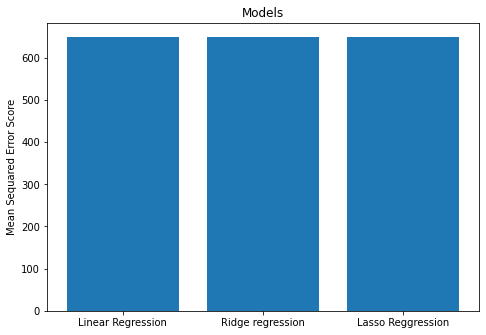

In [22]:
models = ['Linear Regression', 'Ridge regression', 'Lasso Reggression']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,MSE_score)
ax.set_ylabel('Mean Sequared Error Score')
ax.set_title('Models')
plt.show()

# Prediction on Test Dataset

### Selecting Lasso Regression model, because it has 649.93 Mean Sequared error(minimum MSE is better)

In [23]:
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,3,2,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,4,1,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,4,0,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,4,2,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,2,3,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN


In [24]:
X = df_test.drop('Target', axis=1)

### Feature Scaling

In [25]:
# data scaling with sklearn
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scal = StandardScaler().fit(X)

# transform test data
X_scal = scal.transform(X)

In [26]:
# Predict values given the validation features with Lasso Regression
pred_y = reg_lso.predict(X_scal)

In [27]:
# Setting Target column to predicted values
df_test_final["Target"] = pred_y
df_test_final.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,1552.928298
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,553.210413
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,-20.671049
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,1702.529186
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,371.816478


In [28]:
# Exporting Tested data as csv file
df_test_final.to_csv("CE802_P3_Test.csv", index = False)